(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


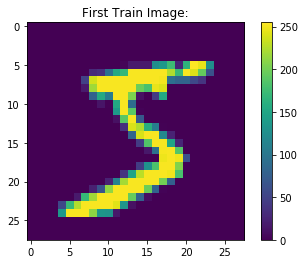

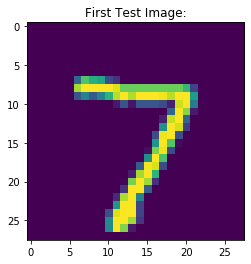

In [2]:
import keras
from keras.datasets import mnist
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical


# Reading the mnist dataset which is 28X28 pixel of 70k integer (0-9) RBG scale images
# Out of these 70K, I am using 60K to train my deep network, rest 10k will be used for validation/testing
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print (train_images.shape);
print (train_labels.shape);
print (train_labels);

# Lets see the images visually using MatPlot
plt.figure()
plt.title('First Train Image:');
plt.imshow(train_images[0]);
plt.colorbar()
plt.grid(False)
plt.show();
plt.title('First Test Image:');
plt.imshow(test_images[0])


In [3]:
## Building the TensorFlow Network
# As this is a categorical classification (multi class, single label) problem, so going with seq "Dense" sort of deep networks
network = models.Sequential();

# First layer is downshaping 28X28 image to a 512 tensor vector, relu is max(0, input)
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)));

# Now adding the last layer downshaping the output of previous layer to 10 (i.e. 0-9) "digits".
# Remember: the output of this layer is merely a probablistic distribution, hence "softmax".
network.add(layers.Dense(10, activation='softmax'))

## lets see how DL network looks like
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Lets compile the network
# Well: compile here means setting up the back propagation, define the loss function and to determine how the model is working
## Optimizer is to reduce the loss function every step, gradient descent, reducing d(loss_fn)/d(layer's weight)
# As it's a categocial classification, so picking up usual cat_crossent as loss method
# How my network is converging? Lets measure 'accuracy'
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']);

In [5]:
# Data preparation: To fit to my model

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Sort of encoding such that the value remains b/w [-1, to +1]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Now Training is done with 5 steps "epoch" on training data
# Batch size typically power of 2, it's the per batch processing in a epoch
validation_images = train_images[:10000]
actual_train_images = train_images[10000:]
validation_labels = train_labels[:10000]
actual_train_labels = train_labels[10000:]
history = network.fit(actual_train_images, actual_train_labels, 
                      epochs=5, 
                      batch_size=128, 
                      validation_data=(validation_images, validation_labels))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 145us/step - loss: 0.2822 - acc: 0.9176 - val_loss: 0.1774 - val_acc: 0.9444
Epoch 2/5
50000/50000 [==============================] - 6s 125us/step - loss: 0.1157 - acc: 0.9660 - val_loss: 0.1129 - val_acc: 0.9642
Epoch 3/5
50000/50000 [==============================] - 6s 124us/step - loss: 0.0758 - acc: 0.9775 - val_loss: 0.0860 - val_acc: 0.9750
Epoch 4/5
50000/50000 [==============================] - 6s 125us/step - loss: 0.0543 - acc: 0.9836 - val_loss: 0.0893 - val_acc: 0.9735
Epoch 5/5
50000/50000 [==============================] - 6s 124us/step - loss: 0.0399 - acc: 0.9880 - val_loss: 0.0791 - val_acc: 0.9760394 - acc


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


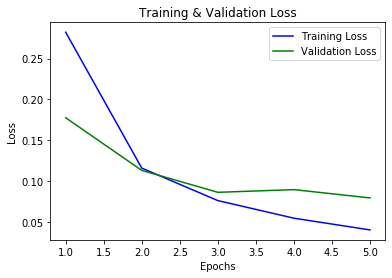

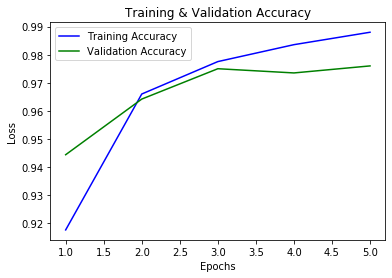

In [7]:
## Let's show the overfitting example

# history object, output of fit methof
his_dict = history.history
print (his_dict.keys())

# loss plotting: Taining vs Validation
loss_values = his_dict['loss']
val_loss_values = his_dict['val_loss']
epochs = range(1, len(his_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   ## clear the plot

# Accuracy plotting: Training vs Validation
acc_values = his_dict['acc']
val_acc_values = his_dict['val_acc']
plt.plot(epochs, acc_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'g', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Now it's QA time! Test it over 10k samples.

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('The accuracy I am expecting:', test_acc);


10000/10000 [==============================] - 1s 71us/step
The accuracy I am expecting: 0.9779


In [9]:
# Prediction section

predictions = network.predict(test_images);
print (predictions.shape);
print ('Probablistic distribution of the first digit prediction: \n' + str(predictions[0]));


# See what we got?
predicted_value = np.argmax(predictions[0]);
print ('Predicted pic: ' + str(predicted_value));
print ('Actual picture under test: ' + str(np.argmax(test_labels[0])));


print ('Bingo!')

(10000, 10)
Probablistic distribution of the first digit prediction: 
[5.2098725e-09 4.2153975e-10 9.0445951e-07 3.0629399e-05 4.7611303e-12
 4.2860414e-08 2.3253760e-14 9.9996722e-01 1.2322017e-08 1.1891833e-06]
Predicted pic: 7
Actual picture under test: 7
Bingo!
